## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo

---
    
### 2. Desarrollo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Leer el dataset
file_path = '/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv'
housing_data = pd.read_csv(file_path)

# Verificando las primeras filas del dataset y sus tipos de datos
housing_data.head(), housing_data.dtypes


(   Unnamed: 0      suburb           address  rooms type      price method  \
 0           0  Abbotsford      85 Turner St      2    h  1480000.0      S   
 1           1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
 2           2  Abbotsford      5 Charles St      3    h  1465000.0     SP   
 3           3  Abbotsford  40 Federation La      3    h   850000.0     PI   
 4           4  Abbotsford       55a Park St      4    h  1600000.0     VB   
 
   seller_g       date  distance  postcode  bedroom_2  bathroom  car  \
 0   Biggin  3/12/2016       2.5    3067.0        2.0       1.0  1.0   
 1   Biggin  4/02/2016       2.5    3067.0        2.0       1.0  0.0   
 2   Biggin  4/03/2017       2.5    3067.0        3.0       2.0  0.0   
 3   Biggin  4/03/2017       2.5    3067.0        3.0       2.0  1.0   
 4   Nelson  4/06/2016       2.5    3067.0        3.0       1.0  2.0   
 
    land_size council_area  latitude  longitude            region_name  \
 0      202.0        Y

In [3]:
# Paso 2: Crear una tabla de contingencia
contingency_table = pd.crosstab(index=housing_data['region_name'], columns=housing_data['type'])

# Mostrar la tabla de contingencia
contingency_table


type,h,t,u
region_name,,,
Eastern Metropolitan,863,102,159
Eastern Victoria,33,0,3
Northern Metropolitan,2332,290,796
Northern Victoria,21,1,0
South-Eastern Metropolitan,224,20,28
Southern Metropolitan,2360,386,1478
Western Metropolitan,1908,226,394
Western Victoria,21,0,1


La tabla de contingencia muestra la distribución de los diferentes tipos de propiedades ('h', 't', y 'u') en cada una de las regiones. A continuación se describen las categorías de la variable 'type':

h: Casa, cabaña, villa, semi, terraza.
t: Townhouse (casa adosada).
u: Unidad, dúplex.
En cuanto a las regiones, parece haber variabilidad en la frecuencia de cada tipo de propiedad. Por ejemplo, la región "Southern Metropolitan" tiene la mayor cantidad de todas las categorías de propiedades, mientras que otras regiones como "Eastern Victoria" y "Western Victoria" tienen significativamente menos propiedades listadas.

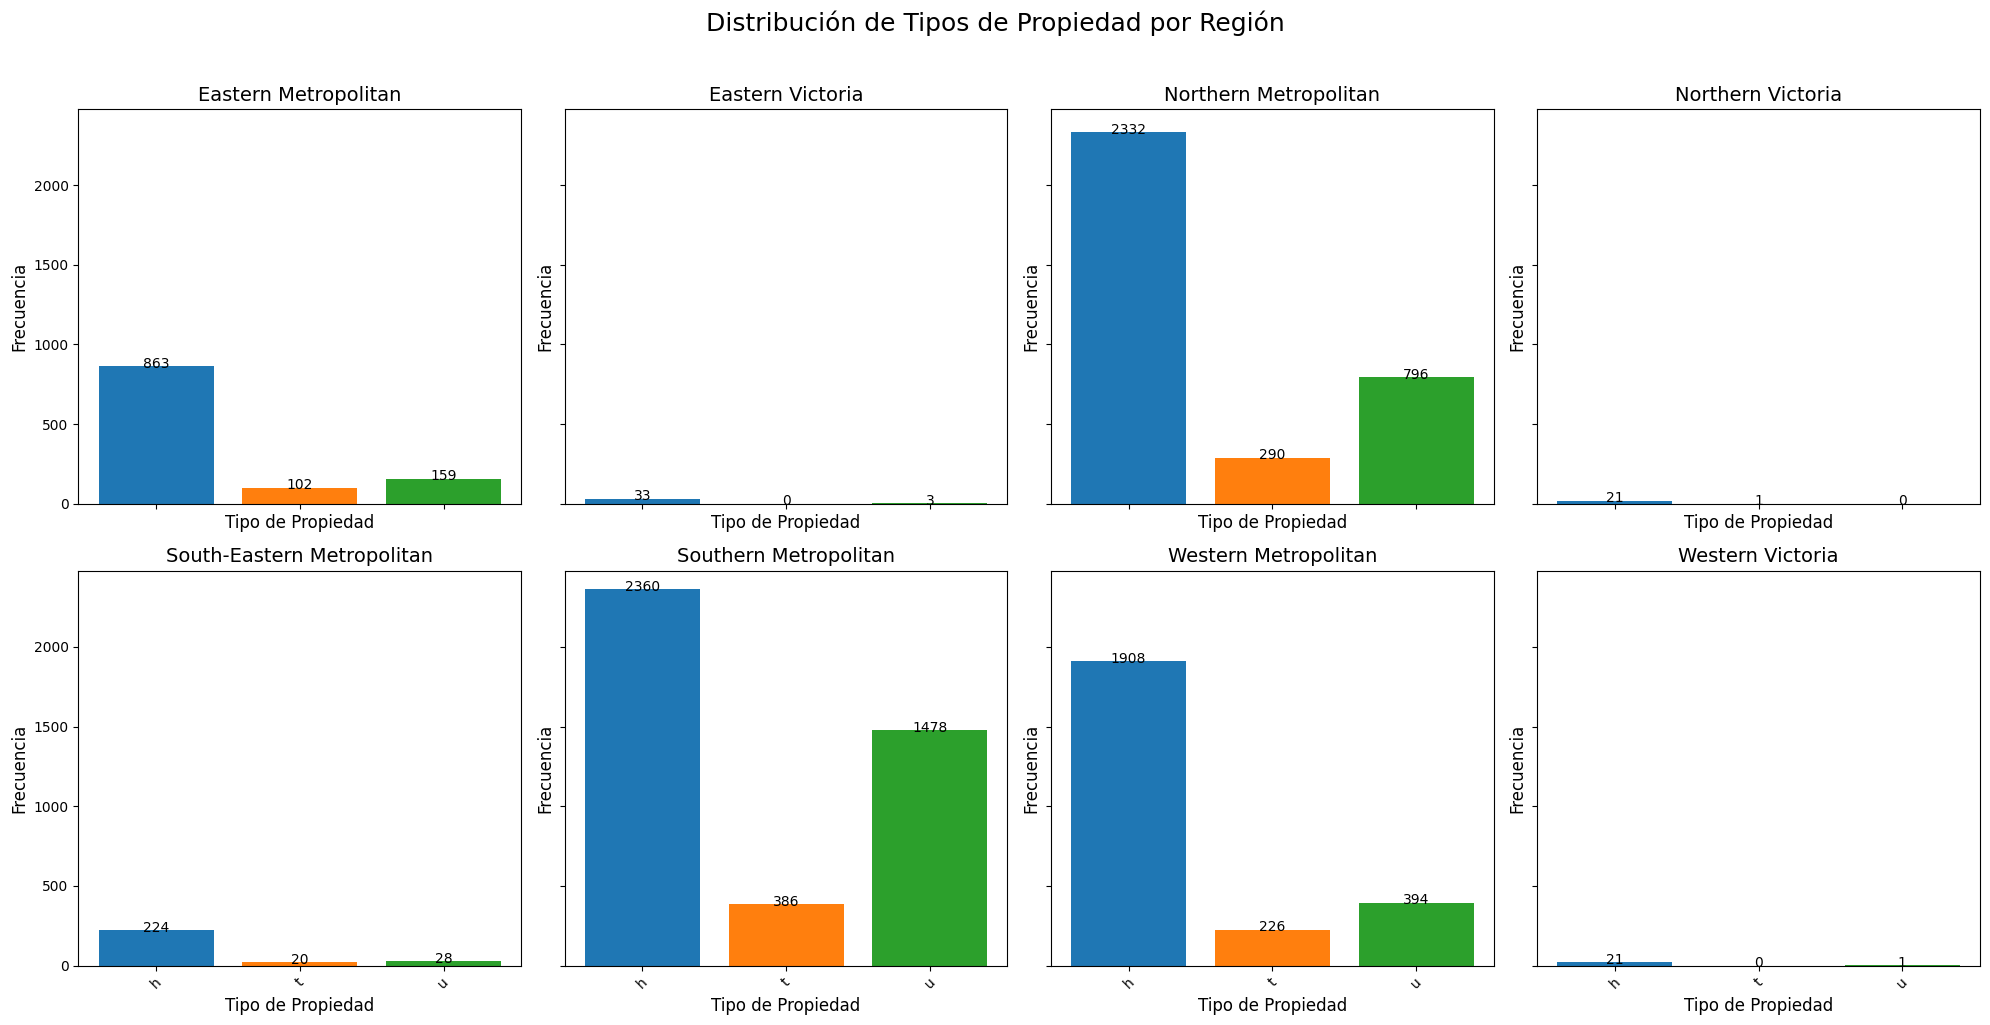

In [5]:
# Paso 3: Generar una figura con 8 subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axs = axs.flatten()

# Añadiendo un título general
plt.suptitle("Distribución de Tipos de Propiedad por Región", fontsize=18, y=1.02)

# Definiendo una paleta de colores
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Iterando sobre cada sub-gráfica
for i, (region, row) in enumerate(contingency_table.iterrows()):
    axs[i].bar(row.index, row.values, color=colors)
    axs[i].set_title(region, fontsize=14)
    axs[i].set_xlabel("Tipo de Propiedad", fontsize=12)
    axs[i].set_ylabel("Frecuencia", fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)

    # Añadiendo anotaciones
    for j, val in enumerate(row.values):
        axs[i].text(j, val + 15, str(val), ha='center', va='center', fontsize=10)

# Ajustando el espacio entre las gráficas
plt.tight_layout()

# Mostrando la figura
plt.show()

La figura muestra la distribución de los tipos de propiedades en cada una de las regiones. A continuación algunos hallazgos y observaciones:

Southern Metropolitan: Esta región tiene la mayor cantidad de propiedades listadas en nuestro dataset, con una predominancia de casas ('h') y una cantidad significativa de unidades ('u') y casas adosadas ('t').

Northern Metropolitan: También presenta una cantidad significativa de propiedades, pero con una mayor presencia de casas en comparación con las unidades y las casas adosadas.

Western Metropolitan: Aunque tiene menos propiedades que las dos regiones anteriores, muestra una tendencia similar con una mayor prevalencia de casas.

Eastern Metropolitan: Predominan las casas, pero hay una presencia notable de unidades y algunas casas adosadas.

South-Eastern Metropolitan: Aunque hay menos propiedades listadas, la distribución de tipos sigue la tendencia general, siendo las casas el tipo más común.

Eastern Victoria, Northern Victoria, y Western Victoria: Estas regiones tienen significativamente menos propiedades listadas en comparación con las otras regiones, siendo las casas el tipo de propiedad predominante y con poca o ninguna presencia de otros tipos.

Reflexiones:
Las casas son el tipo de propiedad más común en todas las regiones, lo cual podría indicar una preferencia o una abundancia de este tipo de propiedad en Melbourne.

Southern Metropolitan y Northern Metropolitan son las regiones con la mayor cantidad de propiedades listadas, lo cual podría indicar áreas de alto desarrollo o popularidad entre los compradores y vendedores.

Las regiones de Victoria (Eastern, Northern, y Western) tienen significativamente menos propiedades, lo cual podría indicar que estas áreas son menos pobladas o menos populares entre los compradores y vendedores en el mercado inmobiliario.

Estos hallazgos pueden ser útiles para los agentes inmobiliarios, inversores, y posibles compradores al entender mejor la disponibilidad y popularidad de diferentes tipos de propiedades en diversas regiones. Es crucial también explorar otros factores como los precios, la accesibilidad, y las comodidades cercanas para obtener una imagen más completa del mercado inmobiliario en estas regiones.